<h1 align=center><font size = 5> LINEAR REGRESSION WITH TENSORFLOW</font></h1>

<a id="ref1"></a>
# Linear Regression

Defining a linear regression in simple terms, its the approximation of a linear model used to describe the relationship betweeen two or more variables. In a simple linear regression there are two variables, the dependent variable, which can be seen as the “state” or “final goal” we study and try to predict, and the independent variables, also known as explanatory variables, which can be seen as the “causes” of the “states”.

When more than one independent variable is present the process is called multiple linear regression. When multiple dependent variables are predicted the process is known as multivariate linear regression.

The very known equation of a simple linear model is:


$$Y = W X + b $$

Where <b>Y</b> is the dependent variable and <b>X</b> is the independent variable, and <b>W</b> and <b>b</b> being the parameters we adjust. <b>W</b> is known as “slope” or “gradient” and <b>b</b> as “intercept”. You can interpret this equation as <b>Y</b> being a function of <b>X</b>, or <b>Y</b> being dependent of <b>X</b>.

If you plot the model, you will see it is a line, and by adjusting the “slope” parameter you will change the angle between the line and the independent variable axis, and the “intercept parameter” will affect where it crosses the dependent variable axis.

Let’s first import packages:

In [19]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


 These are parameters to define that the figures appear in the notebook and their size: 


In [23]:
%matplotlib inline
#plt.rcParams['figure.figsize'] = (10, 6)
print("ok")

ok



Let’s define an independent variable:


In [ ]:
x = np.arange(start=0.0, stop=5.0, step=0.1)
x

In [ ]:
##You can adjust the slope and intercept to verify the changes in the graph
W=1
b=0

# We define de linear ecuation
y= W*x + b 

# And plot it thanks to matplotlib
plt.plot(x,y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

OK… but how can we see this concept of linear relations with a more meaningful point of view?

Simple linear relations were used to try to describe and quantify many observable physical phenomena, the easiest to understand are speed and distance traveled:


<b><pre>

DistanceTraveled = Speed ∗ Time + InitialDistance
Speed = Acceleration ∗ Time + InitialSpeed
</pre></b>

When we perform an experiment and gather the data, or if we already have a dataset and we want to perform a linear regression, what we will do is adjust a simple linear model to the dataset, we adjust the “slope” and “intercept” parameters to the data the best way possible, because the closer the model comes to describing each ocurrence, the better it will be at representing them.

So how is this “regression” performed?

#  Linear Regression with TensorFlow 

We will now see an example using the dumy example of house prices in the slides

In [ ]:
def graph_formula_vs_data(formula, x_vector, y_vector): 
    """
    This function graphs a formula in the form of a line, vs. data points
    """
    x = np.array(range(0, max(x_vector)))  
    y = eval(formula)
    plt.plot(x, y)
    plt.plot(x_vector, y_vector, "ro")
    plt.show()

i: 0 W: [5.9418364] b: [1.0074096] loss: 1592821800000.0 val_loss: [76238.47]


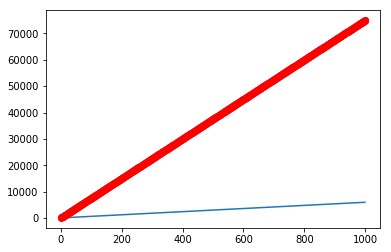

i: 10 W: [40.40492] b: [1.0590839] loss: 399917500000.0 val_loss: [21656.61]


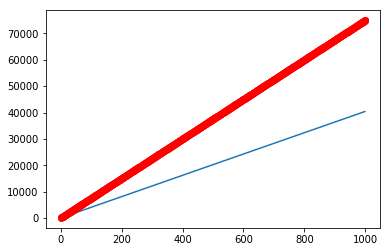

i: 20 W: [57.673466] b: [1.084979] loss: 100409160000.0 val_loss: [6829.77]


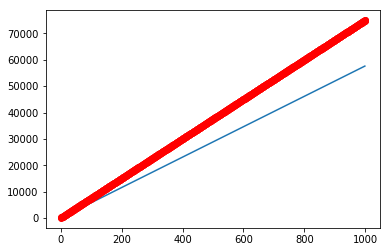

i: 30 W: [66.32628] b: [1.0979574] loss: 25210218000.0 val_loss: [2544.567]


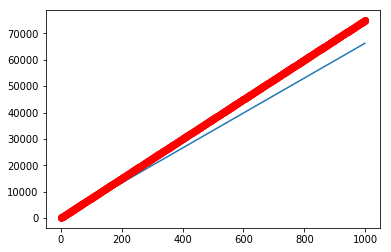

i: 40 W: [70.66197] b: [1.1044631] loss: 6329671700.0 val_loss: [1186.7788]


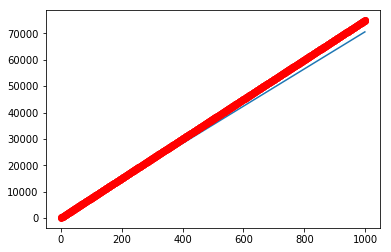

i: 50 W: [72.83448] b: [1.1077257] loss: 1589231100.0 val_loss: [704.6264]


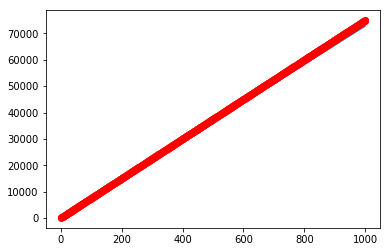

i: 60 W: [73.92306] b: [1.1093632] loss: 399040700.0 val_loss: [512.79877]


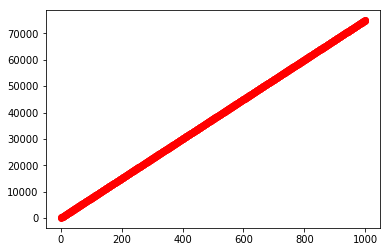

i: 70 W: [74.46851] b: [1.1101865] loss: 100213170.0 val_loss: [429.17224]


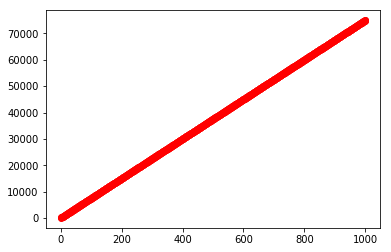

i: 80 W: [74.74183] b: [1.1106015] loss: 25183732.0 val_loss: [390.40613]


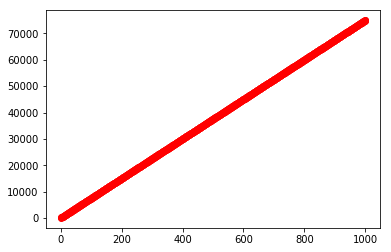

i: 90 W: [74.87878] b: [1.1108123] loss: 6345799.5 val_loss: [371.76962]


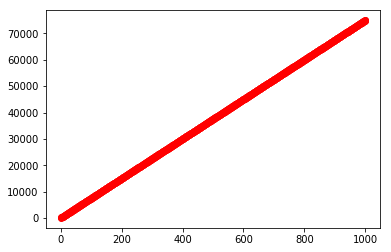

i: 100 W: [74.947395] b: [1.1109205] loss: 1615840.8 val_loss: [362.62866]


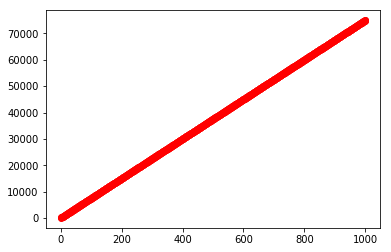

i: 110 W: [74.98179] b: [1.1109776] loss: 427830.34 val_loss: [358.0966]


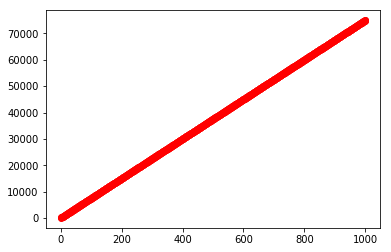

i: 120 W: [74.999016] b: [1.111009] loss: 129640.17 val_loss: [355.83923]


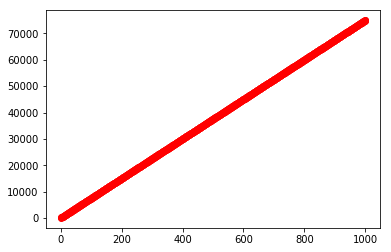

i: 130 W: [75.00764] b: [1.1110274] loss: 54806.234 val_loss: [354.71204]


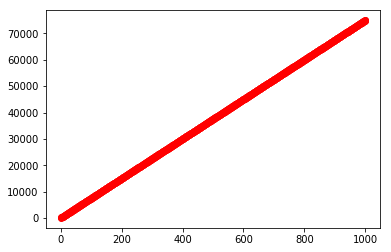

i: 140 W: [75.01198] b: [1.1110392] loss: 35909.676 val_loss: [354.14532]


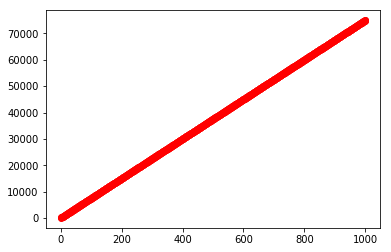

i: 150 W: [75.014145] b: [1.111048] loss: 31185.152 val_loss: [353.86215]


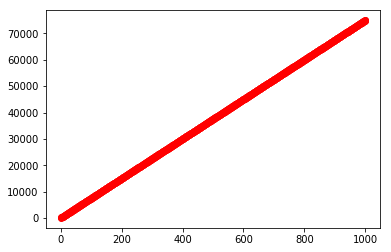

i: 160 W: [75.015236] b: [1.1110551] loss: 29992.836 val_loss: [353.7197]


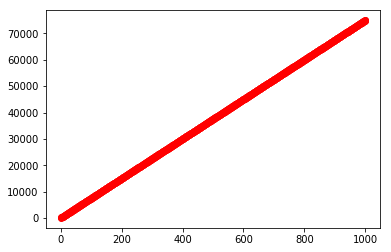

i: 170 W: [75.01578] b: [1.1110611] loss: 29695.83 val_loss: [353.64917]


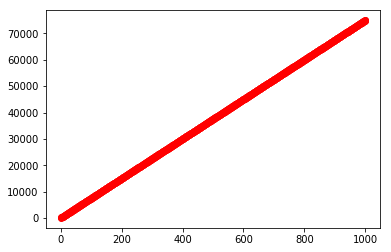

i: 180 W: [75.01605] b: [1.111067] loss: 29620.48 val_loss: [353.61258]


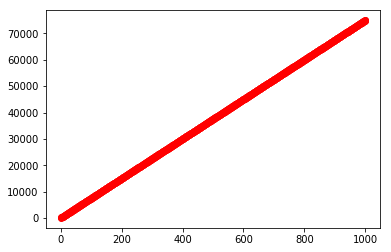

i: 190 W: [75.01618] b: [1.111073] loss: 29602.363 val_loss: [353.59537]


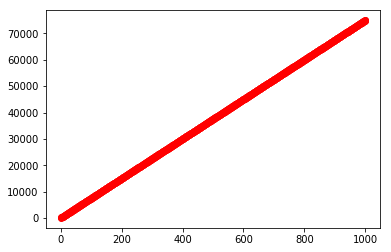

i: 200 W: [75.01626] b: [1.111079] loss: 29596.875 val_loss: [353.58508]


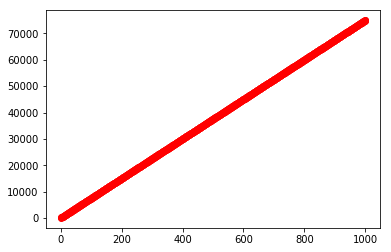

i: 210 W: [75.01627] b: [1.1110849] loss: 29595.71 val_loss: [353.5826]


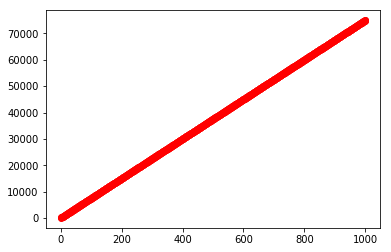

i: 220 W: [75.01627] b: [1.1110909] loss: 29595.71 val_loss: [353.58246]


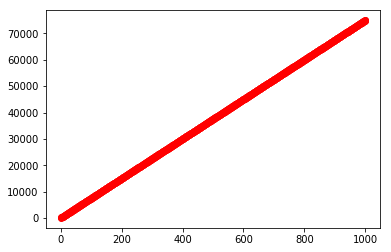

i: 230 W: [75.01627] b: [1.1110969] loss: 29595.709 val_loss: [353.5816]


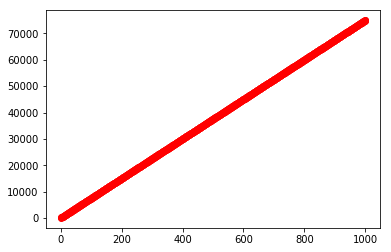

i: 240 W: [75.01627] b: [1.1111028] loss: 29595.709 val_loss: [353.5816]


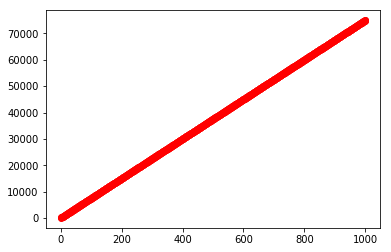

i: 250 W: [75.01627] b: [1.1111088] loss: 29595.705 val_loss: [353.58078]


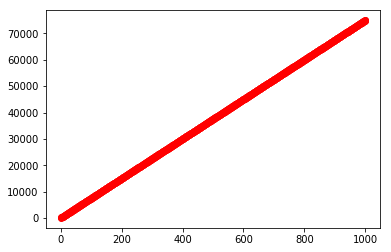

i: 260 W: [75.01627] b: [1.1111147] loss: 29595.7 val_loss: [353.58063]


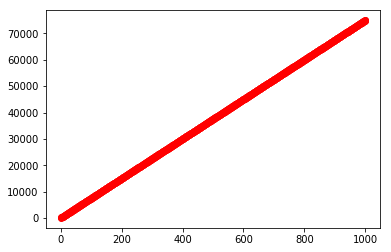

i: 270 W: [75.01627] b: [1.1111207] loss: 29595.7 val_loss: [353.58044]


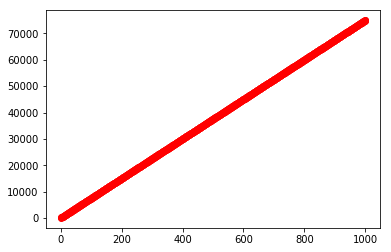

i: 280 W: [75.01627] b: [1.1111267] loss: 29595.697 val_loss: [353.57965]


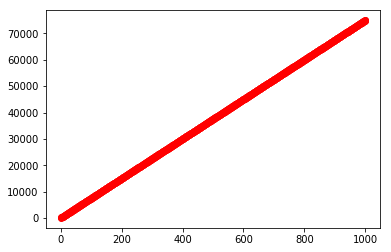

i: 290 W: [75.01627] b: [1.1111326] loss: 29595.695 val_loss: [353.57965]


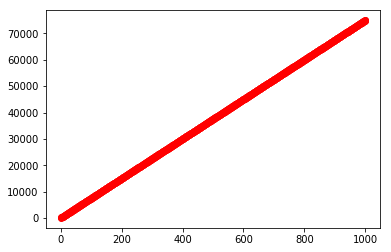

i: 300 W: [75.01627] b: [1.1111386] loss: 29595.695 val_loss: [353.5788]


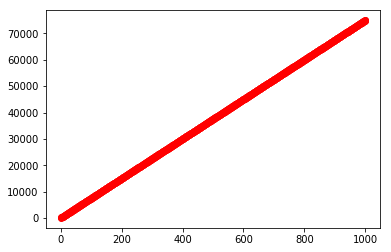

i: 310 W: [75.01627] b: [1.1111445] loss: 29595.693 val_loss: [353.5786]


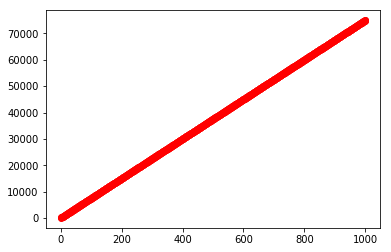

i: 320 W: [75.01627] b: [1.1111505] loss: 29595.656 val_loss: [353.57846]


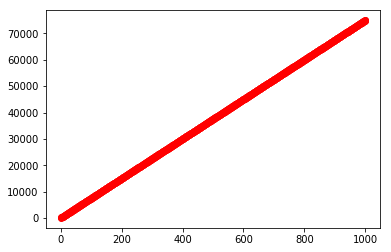

i: 330 W: [75.01627] b: [1.1111565] loss: 29595.656 val_loss: [353.57782]


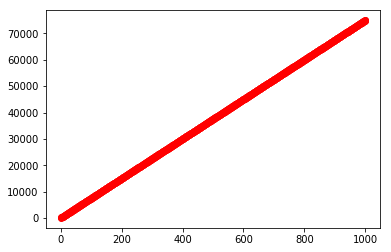

i: 340 W: [75.01627] b: [1.1111624] loss: 29595.654 val_loss: [353.57764]


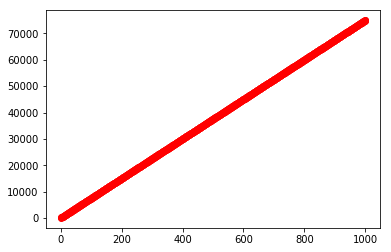

i: 350 W: [75.01627] b: [1.1111684] loss: 29595.652 val_loss: [353.5768]


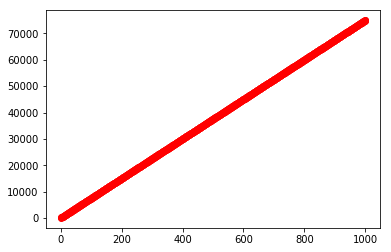

i: 360 W: [75.01627] b: [1.1111743] loss: 29595.652 val_loss: [353.57666]


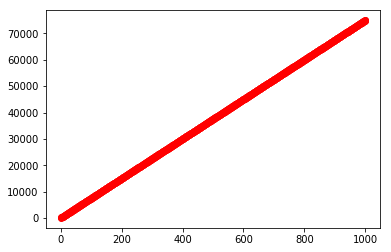

i: 370 W: [75.01627] b: [1.1111803] loss: 29595.645 val_loss: [353.57648]


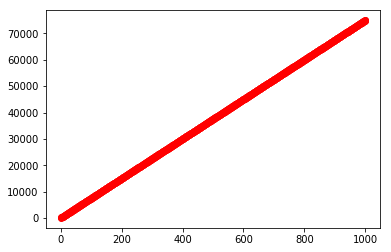

i: 380 W: [75.01627] b: [1.1111863] loss: 29595.643 val_loss: [353.5758]


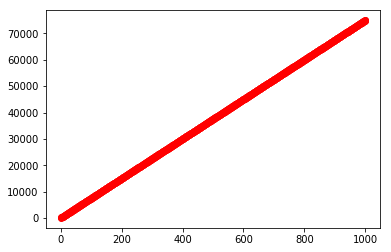

i: 390 W: [75.01627] b: [1.1111922] loss: 29595.643 val_loss: [353.57565]


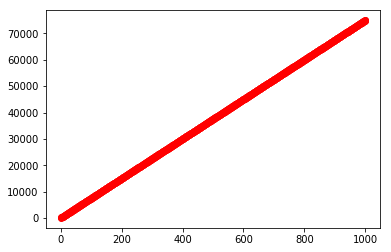

i: 400 W: [75.01627] b: [1.1111982] loss: 29595.643 val_loss: [353.5755]


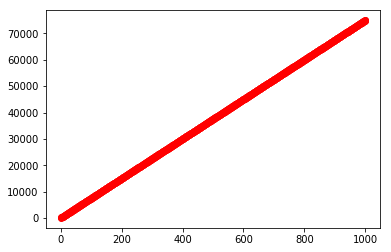

i: 410 W: [75.01627] b: [1.1112041] loss: 29595.639 val_loss: [353.57465]


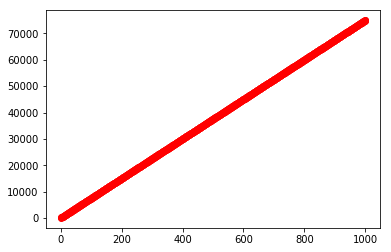

i: 420 W: [75.01627] b: [1.1112101] loss: 29595.506 val_loss: [353.5745]


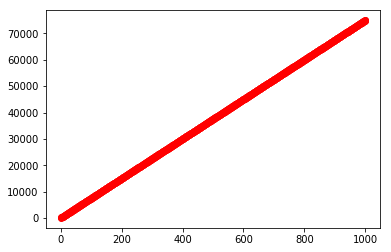

i: 430 W: [75.01627] b: [1.1112161] loss: 29595.504 val_loss: [353.57385]


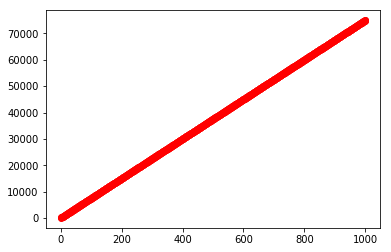

i: 440 W: [75.01627] b: [1.111222] loss: 29595.502 val_loss: [353.57367]


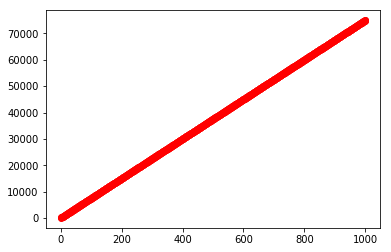

i: 450 W: [75.01627] b: [1.111228] loss: 29595.502 val_loss: [353.5735]


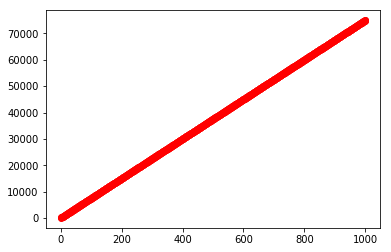

i: 460 W: [75.01627] b: [1.111234] loss: 29595.502 val_loss: [353.5727]


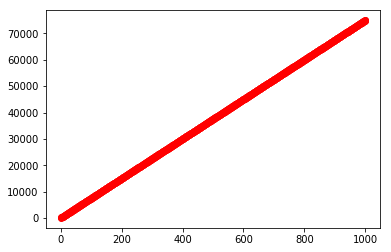

i: 470 W: [75.01627] b: [1.1112399] loss: 29595.492 val_loss: [353.5727]


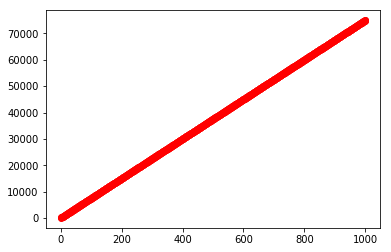

i: 480 W: [75.01627] b: [1.1112459] loss: 29595.492 val_loss: [353.57184]


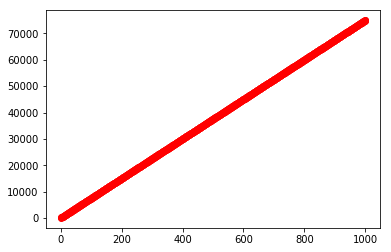

i: 490 W: [75.01627] b: [1.1112518] loss: 29595.49 val_loss: [353.5717]


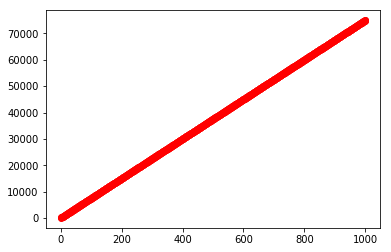

i: 500 W: [75.01627] b: [1.1112578] loss: 29595.49 val_loss: [353.5715]


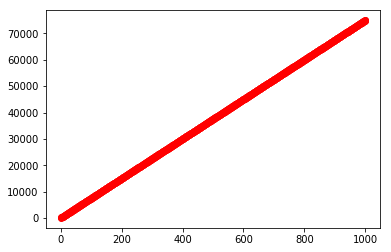

i: 510 W: [75.01627] b: [1.1112638] loss: 29595.49 val_loss: [353.57068]


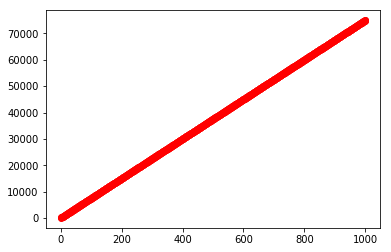

i: 520 W: [75.01627] b: [1.1112697] loss: 29595.451 val_loss: [353.57068]


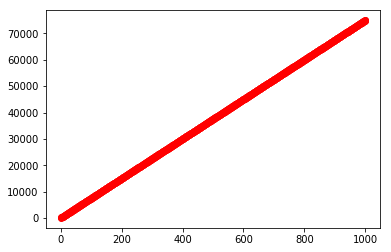

i: 530 W: [75.01627] b: [1.1112757] loss: 29595.451 val_loss: [353.56985]


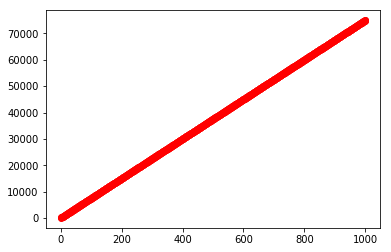

i: 540 W: [75.01627] b: [1.1112816] loss: 29595.451 val_loss: [353.5697]


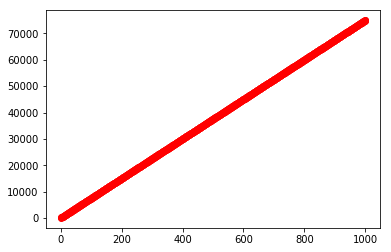

i: 550 W: [75.01627] b: [1.1112876] loss: 29595.451 val_loss: [353.56952]


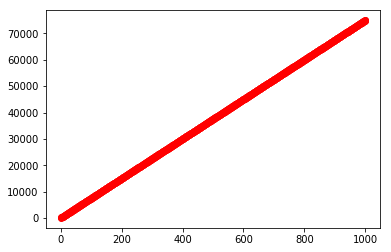

i: 560 W: [75.01627] b: [1.1112936] loss: 29595.45 val_loss: [353.56885]


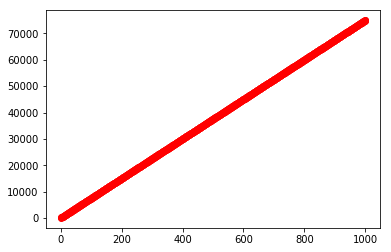

i: 570 W: [75.01627] b: [1.1112995] loss: 29595.44 val_loss: [353.5687]


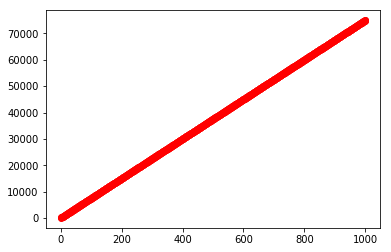

i: 580 W: [75.01627] b: [1.1113055] loss: 29595.438 val_loss: [353.56787]


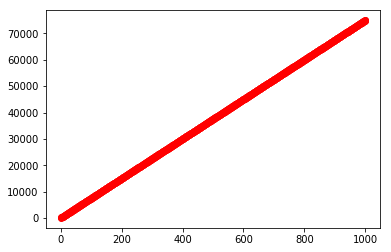

i: 590 W: [75.01627] b: [1.1113114] loss: 29595.438 val_loss: [353.5677]


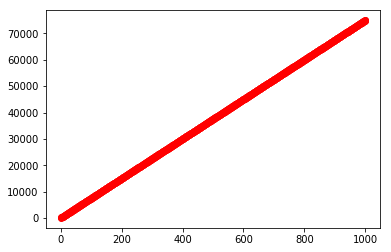

i: 600 W: [75.01627] b: [1.1113174] loss: 29595.436 val_loss: [353.56754]


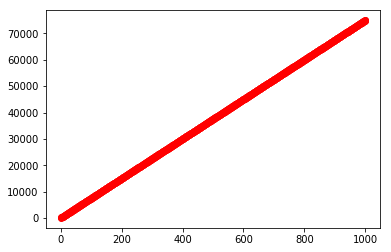

i: 610 W: [75.01627] b: [1.1113234] loss: 29595.436 val_loss: [353.5669]


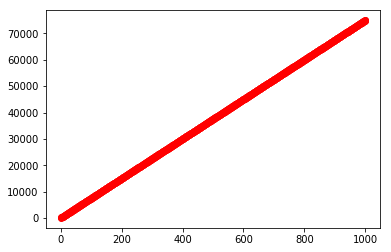

i: 620 W: [75.01627] b: [1.1113293] loss: 29594.652 val_loss: [353.5667]


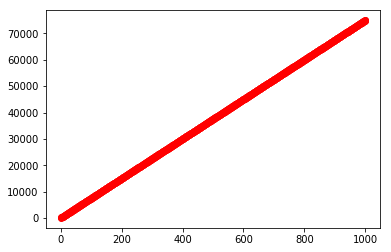

i: 630 W: [75.01627] b: [1.1113353] loss: 29594.652 val_loss: [353.56653]


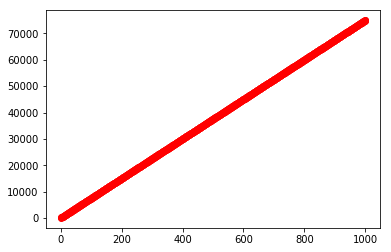

i: 640 W: [75.01627] b: [1.1113412] loss: 29594.652 val_loss: [353.56573]


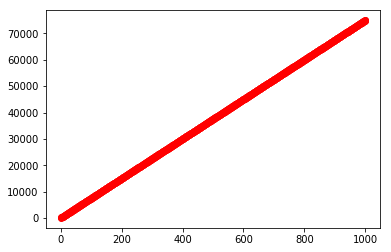

i: 650 W: [75.01627] b: [1.1113472] loss: 29594.652 val_loss: [353.56555]


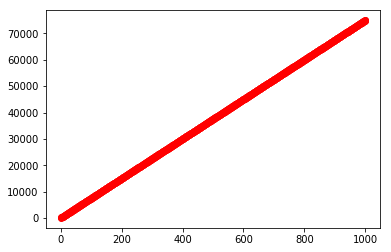

i: 660 W: [75.01627] b: [1.1113532] loss: 29594.648 val_loss: [353.56488]


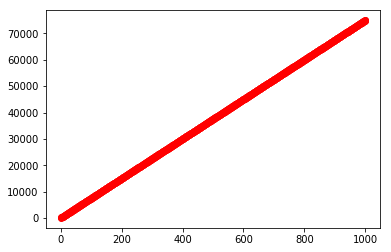

i: 670 W: [75.01627] b: [1.1113591] loss: 29594.64 val_loss: [353.56473]


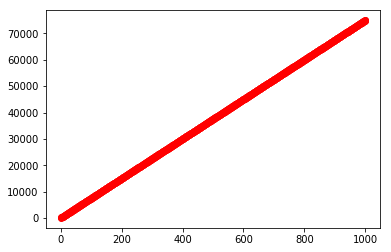

i: 680 W: [75.01627] b: [1.1113651] loss: 29594.64 val_loss: [353.56454]


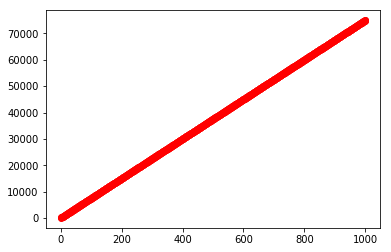

i: 690 W: [75.01627] b: [1.111371] loss: 29594.639 val_loss: [353.56372]


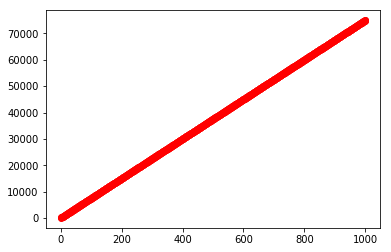

i: 700 W: [75.01627] b: [1.111377] loss: 29594.637 val_loss: [353.56372]


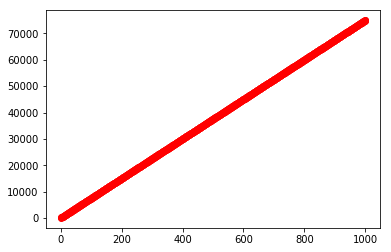

i: 710 W: [75.01627] b: [1.111383] loss: 29594.637 val_loss: [353.5629]


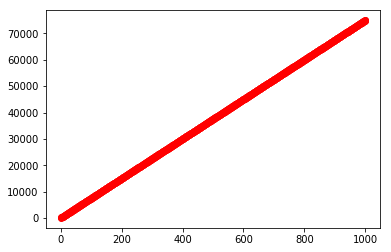

i: 720 W: [75.01627] b: [1.1113889] loss: 29594.637 val_loss: [353.5627]


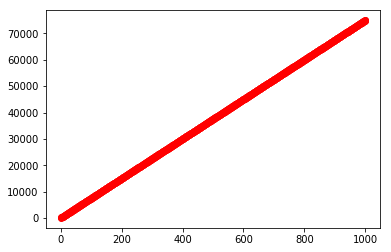

i: 730 W: [75.01627] b: [1.1113949] loss: 29594.6 val_loss: [353.56256]


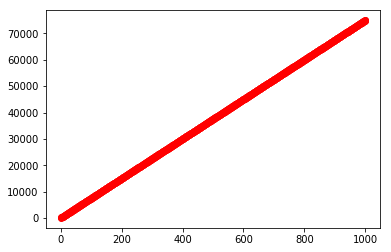

i: 740 W: [75.01627] b: [1.1114008] loss: 29594.6 val_loss: [353.56174]


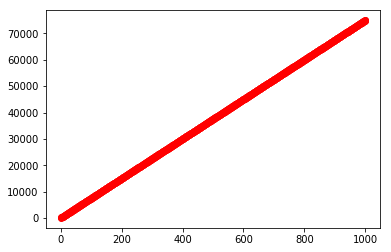

i: 750 W: [75.01627] b: [1.1114068] loss: 29594.598 val_loss: [353.56174]


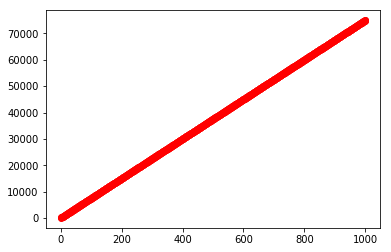

i: 760 W: [75.01627] b: [1.1114128] loss: 29594.598 val_loss: [353.5609]


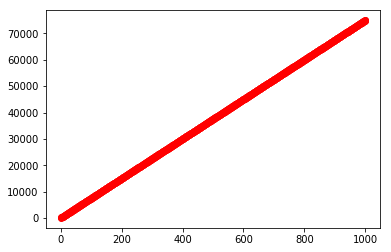

i: 770 W: [75.01627] b: [1.1114187] loss: 29594.598 val_loss: [353.56073]


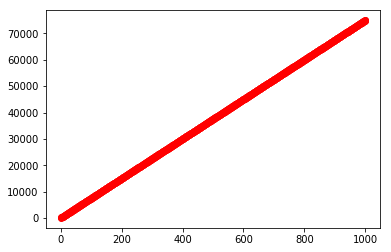

i: 780 W: [75.01627] b: [1.1114247] loss: 29594.588 val_loss: [353.56058]


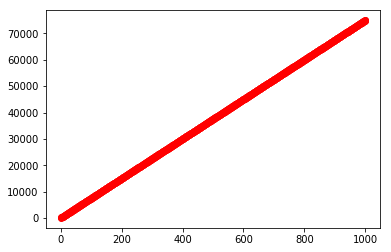

i: 790 W: [75.01627] b: [1.1114306] loss: 29594.588 val_loss: [353.5599]


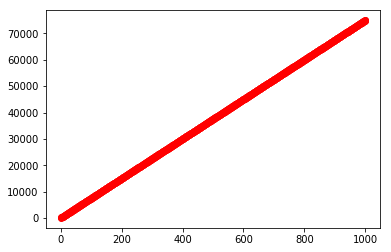

i: 800 W: [75.01627] b: [1.1114366] loss: 29594.584 val_loss: [353.55975]


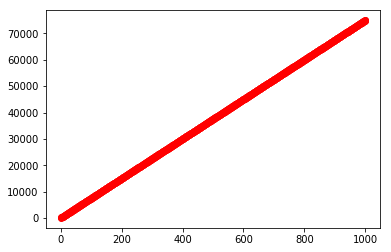

i: 810 W: [75.01627] b: [1.1114426] loss: 29594.584 val_loss: [353.55927]


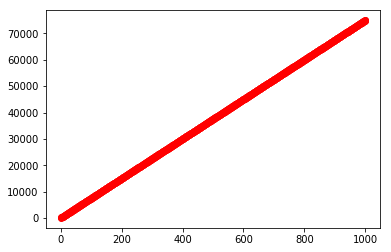

i: 820 W: [75.01627] b: [1.1114485] loss: 29594.584 val_loss: [353.55875]


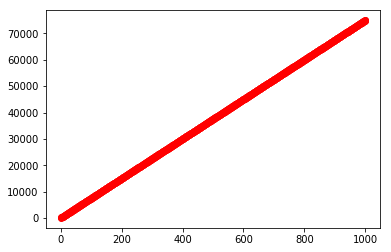

i: 830 W: [75.01627] b: [1.1114545] loss: 29594.45 val_loss: [353.5586]


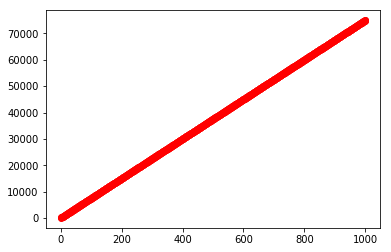

i: 840 W: [75.01627] b: [1.1114604] loss: 29594.447 val_loss: [353.55792]


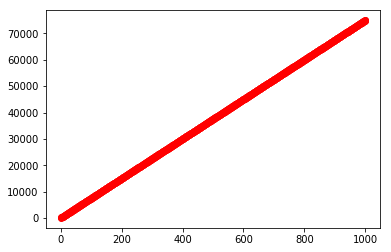

i: 850 W: [75.01627] b: [1.1114664] loss: 29594.447 val_loss: [353.55777]


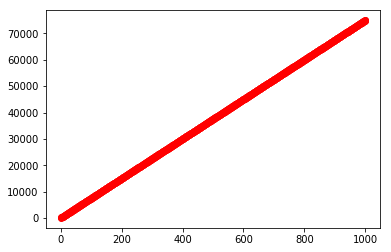

i: 860 W: [75.01627] b: [1.1114724] loss: 29594.447 val_loss: [353.5576]


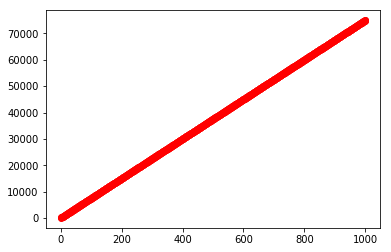

i: 870 W: [75.01627] b: [1.1114783] loss: 29594.445 val_loss: [353.55676]


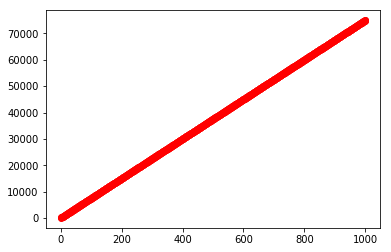

i: 880 W: [75.01627] b: [1.1114843] loss: 29594.436 val_loss: [353.55676]


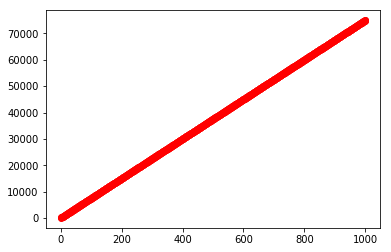

i: 890 W: [75.01627] b: [1.1114902] loss: 29594.436 val_loss: [353.55594]


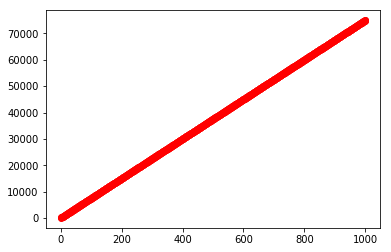

i: 900 W: [75.01627] b: [1.1114962] loss: 29594.432 val_loss: [353.5558]


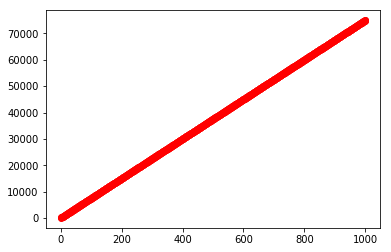

i: 910 W: [75.01627] b: [1.1115022] loss: 29594.432 val_loss: [353.5556]


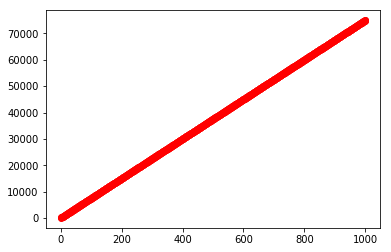

i: 920 W: [75.01627] b: [1.1115081] loss: 29594.432 val_loss: [353.55478]


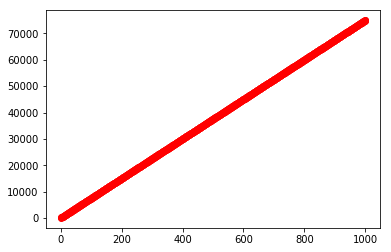

i: 930 W: [75.01627] b: [1.1115141] loss: 29594.396 val_loss: [353.55478]


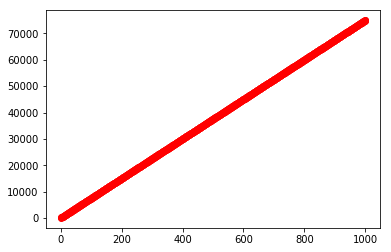

i: 940 W: [75.01627] b: [1.11152] loss: 29594.396 val_loss: [353.55396]


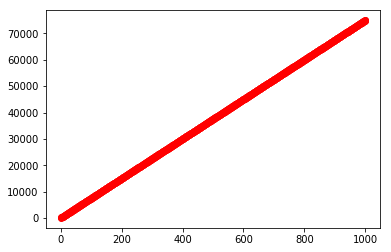

i: 950 W: [75.01627] b: [1.111526] loss: 29594.395 val_loss: [353.55377]


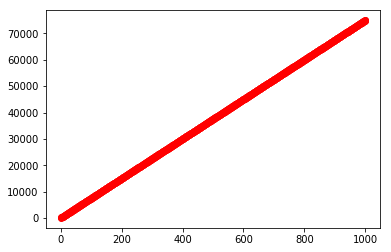

i: 960 W: [75.01627] b: [1.111532] loss: 29594.393 val_loss: [353.55362]


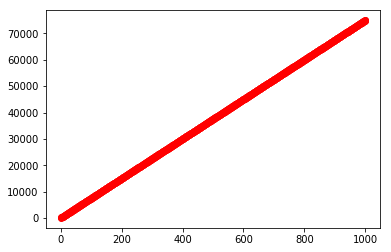

i: 970 W: [75.01627] b: [1.1115379] loss: 29594.393 val_loss: [353.55295]


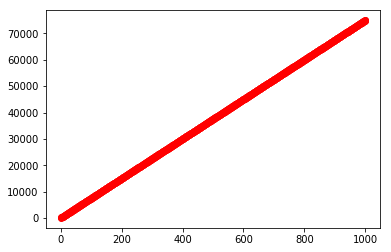

i: 980 W: [75.01627] b: [1.1115439] loss: 29594.383 val_loss: [353.5528]


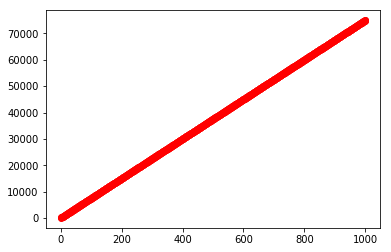

i: 990 W: [75.01627] b: [1.1115499] loss: 29594.38 val_loss: [353.55197]


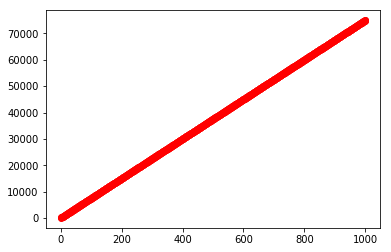

final:
W: [75.01627] b: [1.1115552] loss: 353.55182


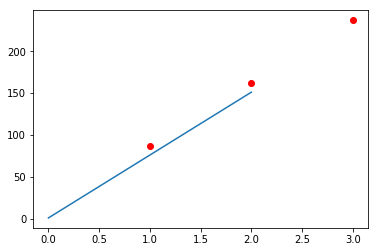

In [75]:
def graph_formula_vs_data(formula, x_vector, y_vector): 
    """
    This function graphs a formula in the form of a line, vs. data points
    """
    x = np.array(range(0, max(x_vector)))  
    y = eval(formula)
    plt.plot(x, y)
    plt.plot(x_vector, y_vector, "ro")
    plt.show()
    
# Model parameters
W = tf.Variable([1.], tf.float32)
b = tf.Variable([1.], tf.float32)

# Model input and output

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Model definition
linear_model = W * x + b

# Loss fucntion
loss = tf.reduce_sum(tf.square(linear_model - y)) # sum of all the squared differences

# Optimizer to perform Gradient Descent
#optimizer = tf.train.GradientDescentOptimizer(0.000001)
optimizer = tf.train.GradientDescentOptimizer(0.0000000001)

# We define the training op as the minimization of the previous function using the optimizer
train = optimizer.minimize(loss)

# Training data, x = house size, y = house price
x_train= np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000])
y_train= np.array([87,162,237,312,387,462,537,612,687,762,837,912,987,1062,1137,1212,1287,1362,1437,1512,1587,1662,1737,1812,1887,1962,2037,2112,2187,2262,2337,2412,2487,2562,2637,2712,2787,2862,2937,3012,3087,3162,3237,3312,3387,3462,3537,3612,3687,3762,3837,3912,3987,4062,4137,4212,4287,4362,4437,4512,4587,4662,4737,4812,4887,4962,5037,5112,5187,5262,5337,5412,5487,5562,5637,5712,5787,5862,5937,6012,6087,6162,6237,6312,6387,6462,6537,6612,6687,6762,6837,6912,6987,7062,7137,7212,7287,7362,7437,7512,7587,7662,7737,7812,7887,7962,8037,8112,8187,8262,8337,8412,8487,8562,8637,8712,8787,8862,8937,9012,9087,9162,9237,9312,9387,9462,9537,9612,9687,9762,9837,9912,9987,10062,10137,10212,10287,10362,10437,10512,10587,10662,10737,10812,10887,10962,11037,11112,11187,11262,11337,11412,11487,11562,11637,11712,11787,11862,11937,12012,12087,12162,12237,12312,12387,12462,12537,12612,12687,12762,12837,12912,12987,13062,13137,13212,13287,13362,13437,13512,13587,13662,13737,13812,13887,13962,14037,14112,14187,14262,14337,14412,14487,14562,14637,14712,14787,14862,14937,15012,15087,15162,15237,15312,15387,15462,15537,15612,15687,15762,15837,15912,15987,16062,16137,16212,16287,16362,16437,16512,16587,16662,16737,16812,16887,16962,17037,17112,17187,17262,17337,17412,17487,17562,17637,17712,17787,17862,17937,18012,18087,18162,18237,18312,18387,18462,18537,18612,18687,18762,18837,18912,18987,19062,19137,19212,19287,19362,19437,19512,19587,19662,19737,19812,19887,19962,20037,20112,20187,20262,20337,20412,20487,20562,20637,20712,20787,20862,20937,21012,21087,21162,21237,21312,21387,21462,21537,21612,21687,21762,21837,21912,21987,22062,22137,22212,22287,22362,22437,22512,22587,22662,22737,22812,22887,22962,23037,23112,23187,23262,23337,23412,23487,23562,23637,23712,23787,23862,23937,24012,24087,24162,24237,24312,24387,24462,24537,24612,24687,24762,24837,24912,24987,25062,25137,25212,25287,25362,25437,25512,25587,25662,25737,25812,25887,25962,26037,26112,26187,26262,26337,26412,26487,26562,26637,26712,26787,26862,26937,27012,27087,27162,27237,27312,27387,27462,27537,27612,27687,27762,27837,27912,27987,28062,28137,28212,28287,28362,28437,28512,28587,28662,28737,28812,28887,28962,29037,29112,29187,29262,29337,29412,29487,29562,29637,29712,29787,29862,29937,30012,30087,30162,30237,30312,30387,30462,30537,30612,30687,30762,30837,30912,30987,31062,31137,31212,31287,31362,31437,31512,31587,31662,31737,31812,31887,31962,32037,32112,32187,32262,32337,32412,32487,32562,32637,32712,32787,32862,32937,33012,33087,33162,33237,33312,33387,33462,33537,33612,33687,33762,33837,33912,33987,34062,34137,34212,34287,34362,34437,34512,34587,34662,34737,34812,34887,34962,35037,35112,35187,35262,35337,35412,35487,35562,35637,35712,35787,35862,35937,36012,36087,36162,36237,36312,36387,36462,36537,36612,36687,36762,36837,36912,36987,37062,37137,37212,37287,37362,37437,37512,37587,37662,37737,37812,37887,37962,38037,38112,38187,38262,38337,38412,38487,38562,38637,38712,38787,38862,38937,39012,39087,39162,39237,39312,39387,39462,39537,39612,39687,39762,39837,39912,39987,40062,40137,40212,40287,40362,40437,40512,40587,40662,40737,40812,40887,40962,41037,41112,41187,41262,41337,41412,41487,41562,41637,41712,41787,41862,41937,42012,42087,42162,42237,42312,42387,42462,42537,42612,42687,42762,42837,42912,42987,43062,43137,43212,43287,43362,43437,43512,43587,43662,43737,43812,43887,43962,44037,44112,44187,44262,44337,44412,44487,44562,44637,44712,44787,44862,44937,45012,45087,45162,45237,45312,45387,45462,45537,45612,45687,45762,45837,45912,45987,46062,46137,46212,46287,46362,46437,46512,46587,46662,46737,46812,46887,46962,47037,47112,47187,47262,47337,47412,47487,47562,47637,47712,47787,47862,47937,48012,48087,48162,48237,48312,48387,48462,48537,48612,48687,48762,48837,48912,48987,49062,49137,49212,49287,49362,49437,49512,49587,49662,49737,49812,49887,49962,50037,50112,50187,50262,50337,50412,50487,50562,50637,50712,50787,50862,50937,51012,51087,51162,51237,51312,51387,51462,51537,51612,51687,51762,51837,51912,51987,52062,52137,52212,52287,52362,52437,52512,52587,52662,52737,52812,52887,52962,53037,53112,53187,53262,53337,53412,53487,53562,53637,53712,53787,53862,53937,54012,54087,54162,54237,54312,54387,54462,54537,54612,54687,54762,54837,54912,54987,55062,55137,55212,55287,55362,55437,55512,55587,55662,55737,55812,55887,55962,56037,56112,56187,56262,56337,56412,56487,56562,56637,56712,56787,56862,56937,57012,57087,57162,57237,57312,57387,57462,57537,57612,57687,57762,57837,57912,57987,58062,58137,58212,58287,58362,58437,58512,58587,58662,58737,58812,58887,58962,59037,59112,59187,59262,59337,59412,59487,59562,59637,59712,59787,59862,59937,60012,60087,60162,60237,60312,60387,60462,60537,60612,60687,60762,60837,60912,60987,61062,61137,61212,61287,61362,61437,61512,61587,61662,61737,61812,61887,61962,62037,62112,62187,62262,62337,62412,62487,62562,62637,62712,62787,62862,62937,63012,63087,63162,63237,63312,63387,63462,63537,63612,63687,63762,63837,63912,63987,64062,64137,64212,64287,64362,64437,64512,64587,64662,64737,64812,64887,64962,65037,65112,65187,65262,65337,65412,65487,65562,65637,65712,65787,65862,65937,66012,66087,66162,66237,66312,66387,66462,66537,66612,66687,66762,66837,66912,66987,67062,67137,67212,67287,67362,67437,67512,67587,67662,67737,67812,67887,67962,68037,68112,68187,68262,68337,68412,68487,68562,68637,68712,68787,68862,68937,69012,69087,69162,69237,69312,69387,69462,69537,69612,69687,69762,69837,69912,69987,70062,70137,70212,70287,70362,70437,70512,70587,70662,70737,70812,70887,70962,71037,71112,71187,71262,71337,71412,71487,71562,71637,71712,71787,71862,71937,72012,72087,72162,72237,72312,72387,72462,72537,72612,72687,72762,72837,72912,72987,73062,73137,73212,73287,73362,73437,73512,73587,73662,73737,73812,73887,73962,74037,74112,74187,74262,74337,74412,74487,74562,74637,74712,74787,74862,74937,75012])

# Testing data
x_test = np.array([1, 2, 3])
y_test = np.array([87, 162 ,237])

#y_test = np.array([75, 140 ,205])
#y_test = np.array([20,40,60])
#y_test = np.array([87, 162 ,237])
#y_test = np.array([98,183,268])
#y_test = np.array([27,52,77])



# We define the initialization op
init = tf.global_variables_initializer()

# We create a session variable
sess = tf.Session()

# We initialize the variables
sess.run(init)

# We do 1000 training iterations
for i in range(1000):
    sess.run(train, {x:x_train, y:y_train})
    # We evaluate the accuracy of the training every 10 iterations
    if i % 10 == 0:
    #if 1==1:
        curr_W, curr_b, curr_loss  = sess.run([W, b, loss], {x:x_train, y:y_train})
        val_loss = sess.run([loss], {x:x_test, y:y_test})
        print("i: %s W: %s b: %s loss: %s val_loss: %s"%(i, curr_W, curr_b, curr_loss, val_loss))
        # This formula represents w * x + b in the form of a string so we can graph it, nothing to do with TensorFlow!
        stringfied_formula=str(curr_W[0]) + "*x +" + str(curr_b[0])
        graph_formula_vs_data(formula=stringfied_formula, x_vector=x_train, y_vector=y_train)
print("final:")
# We make a final evaluation of the model's loss using the testing data
curr_W, curr_b, curr_loss  = sess.run([W, b, loss], {x:x_test, y:y_test})
print("W: %s b: %s loss: %s"%(curr_W, curr_b, curr_loss))
stringfied_formula=str(curr_W[0]) + "*x +" + str(curr_b[0])
graph_formula_vs_data(formula=stringfied_formula, x_vector=x_test, y_vector=y_test)
#W: [37.053986] b: [1.0540581] loss: 25502.29 000000000001
#W: [74.91648] b: [1.1104057] loss: 366.76086 000000000001
#W: [74.92514] b: [1.1108869] loss: 365.57874 00000000001
#W: [75.01627] b: [1.1115552] loss: 353.55182 0000000001
#W: [75.01632] b: [1.1164521] loss: 353.22723 000000001
#W: [75.01625] b: [1.1650342] loss: 350.0801  000000001 10000
#W: [75.01553] b: [1.6408803] loss: 320.0064  000000001 100000
#
# A W: [75.01632] b: [1.1164521] loss: 573.5598
# B W: [75.01632] b: [1.1164521] loss: 43115.953
# C W: [75.01632] b: [1.1164521] loss: 353.22723
# D W: [75.01632] b: [1.1164521] loss: 3242.789
# E W: [75.01632] b: [1.1164521] loss: 34494.89

